In [2]:
import os
import numpy as np
import re
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
import operator
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./tsla_data_file_with_sent.csv")
df

,close,open,high,low,volume,sentiment
0,364.01,365.12,367.3600,363.9100,25429807,0.0000
1,381.91,389.06,399.8200,381.0300,43528308,0.0000
2,352.78,347.90,354.7700,346.0900,76721048,0.2732
3,373.81,370.00,375.7800,369.8700,26084791,0.0000
4,364.01,365.12,367.3600,363.9100,25429807,0.7425
...,...,...,...,...,...,...
150,362.00,353.25,362.1736,351.2800,29154717,-0.3400
151,336.08,349.31,351.0600,335.5900,44058913,0.3818
152,373.81,370.00,375.7800,369.8700,26084791,0.2960
153,364.88,360.70,365.0000,357.5700,32015338,0.0000


In [4]:
dfcp = df
dfcp

,close,open,high,low,volume,sentiment
0,364.01,365.12,367.3600,363.9100,25429807,0.0000
1,381.91,389.06,399.8200,381.0300,43528308,0.0000
2,352.78,347.90,354.7700,346.0900,76721048,0.2732
3,373.81,370.00,375.7800,369.8700,26084791,0.0000
4,364.01,365.12,367.3600,363.9100,25429807,0.7425
...,...,...,...,...,...,...
150,362.00,353.25,362.1736,351.2800,29154717,-0.3400
151,336.08,349.31,351.0600,335.5900,44058913,0.3818
152,373.81,370.00,375.7800,369.8700,26084791,0.2960
153,364.88,360.70,365.0000,357.5700,32015338,0.0000


In [5]:
for i in range(155):
    new = df['close'][i] - df['open'][i]
    if new >= 0:
        dfcp['close'][i] = 1
    else:
        dfcp['close'][i] = 0
dfcp.astype(int)

<ipython-input-5-7c1b5f4b9ad3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcp['close'][i] = 0
<ipython-input-5-7c1b5f4b9ad3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcp['close'][i] = 1


,close,open,high,low,volume,sentiment
0,0,365,367,363,25429807,0
1,0,389,399,381,43528308,0
2,1,347,354,346,76721048,0
3,1,370,375,369,26084791,0
4,0,365,367,363,25429807,0
...,...,...,...,...,...,...
150,1,353,362,351,29154717,0
151,0,349,351,335,44058913,0
152,1,370,375,369,26084791,0
153,1,360,365,357,32015338,0


In [6]:
close_label = dfcp['close'] 
features = df[['open', 'high', 'low', 'volume', 'sentiment']] 

In [7]:
close_label

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
150    1.0
151    0.0
152    1.0
153    1.0
154    1.0
Name: close, Length: 155, dtype: float64

In [8]:
train_size = int(len(df)*.8)
df_train = df[:train_size]
df_test = df[train_size:]

df_train_x = df_train[['open', 'high', 'low', 'sentiment']]
df_train_y = df_train['close'] 

df_test_x = df_test[['open', 'high', 'low', 'sentiment']]
df_test_y = df_test['close']
df_test_y

124    1.0
125    0.0
126    0.0
127    1.0
128    0.0
129    0.0
130    1.0
131    1.0
132    1.0
133    0.0
134    1.0
135    0.0
136    1.0
137    1.0
138    1.0
139    0.0
140    0.0
141    1.0
142    1.0
143    0.0
144    0.0
145    1.0
146    0.0
147    1.0
148    0.0
149    1.0
150    1.0
151    0.0
152    1.0
153    1.0
154    1.0
Name: close, dtype: float64

In [9]:
forest = RandomForestClassifier()
forest.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [10]:
print("Accuracy: " + str(round(forest.score(df_test_x, df_test_y), 4)))

Accuracy: 0.8387


In [16]:
importances = forest.feature_importances_
features = df_test_x.columns
feature_importances = pd.DataFrame(forest.feature_importances_, index = features,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
open,0.333143
low,0.315143
high,0.271867
sentiment,0.079846


In [17]:
tree = DecisionTreeClassifier(max_depth=5)

In [18]:
tree.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=5)

In [19]:
print("Accuracy: " + str(round(tree.score(df_test_x, df_test_y), 4)))

Accuracy: 0.7742


In [20]:
importances = forest.feature_importances_
features = df_test_x.columns
feature_importances = pd.DataFrame(tree.feature_importances_, index = features,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
open,0.789095
low,0.120743
high,0.049229
sentiment,0.040933


<BarContainer object of 4 artists>

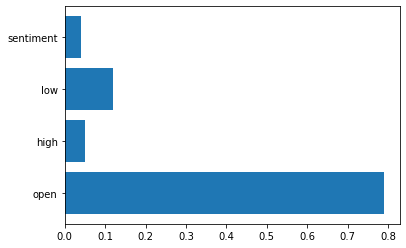

In [21]:
plt.barh(features, tree.feature_importances_)

<BarContainer object of 4 artists>

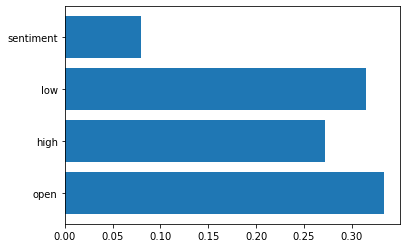

In [22]:
plt.barh(features, forest.feature_importances_)